In [2]:
base_dir = 'C:/temp'
video_file = 'frame 1.bin'

In [12]:
import os.path
file = open(os.path.join(base_dir,video_file), "rb")

byte = 
print(len(byte))

2013088


503272


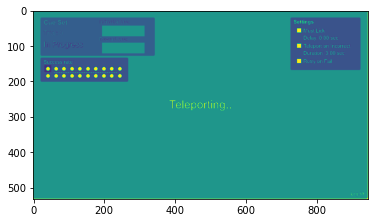

In [20]:
import numpy as np
import matplotlib.pyplot as plt
file = open(os.path.join(base_dir,video_file), "rb")
dt = np.dtype({'names': ['r','g','b','a'],
               'formats': [np.uint8, np.uint8, np.uint8, np.uint8]})
I = np.frombuffer(file.read(), dtype=dt)
print(I.size)
imgplot = plt.imshow(I['r'].reshape((532, 946)))